In [43]:
#calling library
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

In [44]:
#summon data
df = pd.read_csv('EPL7-1-22(Gls_XG).csv')
df.head()

,Squad,Gls,xG
0,NaN,NaN,NaN
1,Arsenal,33.0,29.8
2,Aston Villa,23.0,19.4
3,Brentford,22.0,22.4
4,Brighton,20.0,21.6


In [55]:
#cleaning data
df.dropna()
df.head()

,Squad,Gls,xG,path
1,Arsenal,33.0,29.8,Arsenal.png
2,Aston Villa,23.0,19.4,Aston Villa.png
3,Brentford,22.0,22.4,Brentford.png
4,Brighton,20.0,21.6,Brighton.png
5,Burnley,15.0,16.9,Burnley.png


In [62]:
df['path'] = 'Images/'+df['Squad'] + '.png'
df.head()

,Squad,Gls,xG,path
1,Arsenal,33.0,29.8,Images/Arsenal.png
2,Aston Villa,23.0,19.4,Images/Aston Villa.png
3,Brentford,22.0,22.4,Images/Brentford.png
4,Brighton,20.0,21.6,Images/Brighton.png
5,Burnley,15.0,16.9,Images/Burnley.png


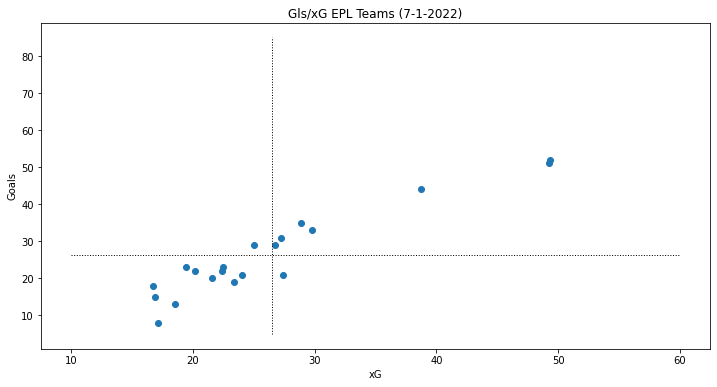

In [56]:
#plotting scatter
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.plot(df['xG'], df['Gls'], 'o')
plt.plot([df['Gls'].mean(),df['Gls'].mean()],[5,85],'k-', linestyle = ":", lw=1)
plt.plot([10, 60],[df['xG'].mean(), df['xG'].mean()], 'k-', linestyle = ":", lw=1)

ax.set_title("Gls/xG EPL Teams (7-1-2022)")
ax.set_xlabel("xG")
ax.set_ylabel("Goals")

In [57]:
#function for adding image
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

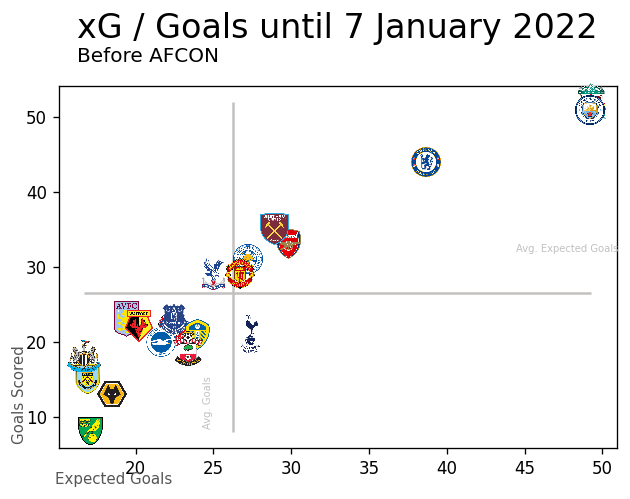

In [73]:
#Scatter with logos
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['Gls'], color='white')

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['Gls']), frameon=False)
    ax.add_artist(ab)

plt.hlines(df['Gls'].mean(), df['xG'].min(), df['xG'].max(), color='#c2c1c0')
plt.vlines(df['xG'].mean(), df['Gls'].min(), df['Gls'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'xG / Goals until 7 January 2022',size=20)
fig.text(.15,.93,'Before AFCON', size=12)

## Avg line explanation
fig.text(.06,.14,'Goals Scored', size=9, color='#575654',rotation=90)
fig.text(.12,0.05,'Expected Goals', size=9, color='#575654')

## Axes titles
fig.text(.76,.535,'Avg. Expected Goals', size=6, color='#c2c1c0')
fig.text(.325,.17,'Avg. Goals', size=6, color='#c2c1c0',rotation=90)